TensorFlow

In [2]:
#!pip install tensorflow

In [3]:
import tensorflow as tf
import numpy as np

print (tf.__version__)

2.13.0


In [4]:
tf.config.list_physical_devices('GPU')

[]

In [5]:
# Scalar, vector, matrix, tensor
# Basic operations

In [6]:
tf.constant(3)

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [7]:
tf.constant([2.0,3.0,4.0])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([2., 3., 4.], dtype=float32)>

In [8]:
a = tf.constant([[3,2],[5,2]])
a

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[3, 2],
       [5, 2]])>

In [9]:
np.array(a)

array([[3, 2],
       [5, 2]])

In [10]:
a.numpy()

array([[3, 2],
       [5, 2]])

In [11]:
b = tf.constant([[9,5],[1,3]])

In [12]:
tf.add(a,b)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[12,  7],
       [ 6,  5]])>

In [13]:
a+b

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[12,  7],
       [ 6,  5]])>

In [14]:
a*b

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[27, 10],
       [ 5,  6]])>

In [15]:
ab = tf.concat(values=[a,b],axis=0)
ab

<tf.Tensor: shape=(4, 2), dtype=int32, numpy=
array([[3, 2],
       [5, 2],
       [9, 5],
       [1, 3]])>

In [16]:
tf.reshape(ab,shape=(1,8))

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[3, 2, 5, 2, 9, 5, 1, 3]])>

In [17]:
# Matrix mulitplication
a@b

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[29, 21],
       [47, 31]])>

In [18]:
tf.matmul(a,b)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[29, 21],
       [47, 31]])>

In [19]:
# Physical location of tensor:
ab.device

'/job:localhost/replica:0/task:0/device:CPU:0'

In [20]:
import time

def time_mat_mul(x):
    start = time.time()
    for loop in range(10):
        tf.matmul(x,x)
    result = time.time()-start
    print (result)

with tf.device("CPU:0"):
    x = tf.random.uniform([1000,1000])
    x.device.endswith("CPU:0")
    time_mat_mul(x)

0.5188326835632324


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam, SGD


In [22]:
from keras.datasets import fashion_mnist
(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()

In [23]:
y_train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [24]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [25]:
X_train.shape

(60000, 28, 28)

In [26]:
y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

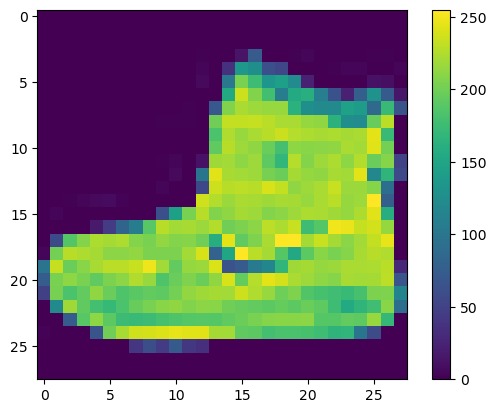

In [27]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.show()

In [28]:
X_train = X_train/255.0
X_test = X_test/255.0


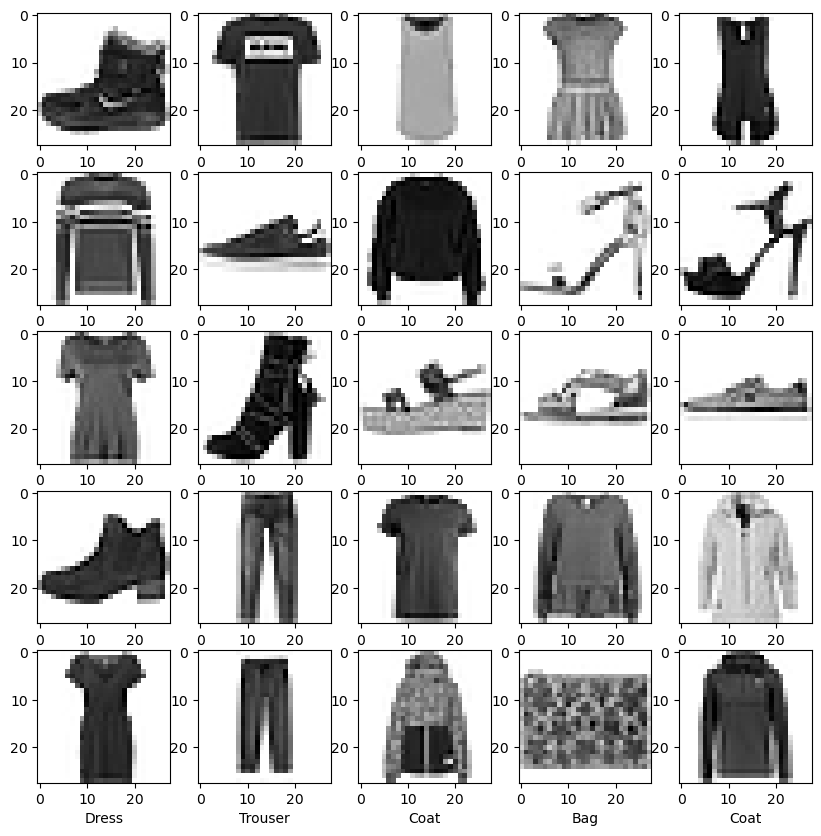

In [29]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_labels[i]])
plt.show()

In [30]:
# Building model:

In [31]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model

model = Sequential([
    # transforming 2d -> to 1d vector by flatten
    # it's not NN layer it's just transform
    Flatten(input_shape=(28,28)),
    # The first NN layer
    Dense(128, activation='relu'),
    # The second (output) NN layer
    Dense(10)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
# Manual NN 
inputs = Input(shape=(28,28))
x1 = Flatten()(inputs)
x2 = Dense(128, activation='relu')(x1)
#x3 = Dense(128, activation='relu')(x2)
#outputs = Dense(10)(x2)
x1,x2#,outputs

(<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'flatten_2')>,
 <KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dense_3')>)

In [35]:
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy

model.compile(optimizer=Adam(),loss=CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [36]:
model.fit(X_train, y_train,epochs=5,batch_size=256,validation_data=(X_test,y_test))

Epoch 1/5
235/235 [==============================] - 4s 9ms/step - loss: 0.6156 - accuracy: 0.7929 - val_loss: 0.4960 - val_accuracy: 0.8251
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.4319 - accuracy: 0.8503 - val_loss: 0.4391 - val_accuracy: 0.8461
Epoch 3/5
235/235 [==============================] - 1s 5ms/step - loss: 0.3907 - accuracy: 0.8635 - val_loss: 0.4237 - val_accuracy: 0.8515
Epoch 4/5
235/235 [==============================] - 1s 5ms/step - loss: 0.3664 - accuracy: 0.8704 - val_loss: 0.3932 - val_accuracy: 0.8597
Epoch 5/5
235/235 [==============================] - 1s 5ms/step - loss: 0.3461 - accuracy: 0.8792 - val_loss: 0.3852 - val_accuracy: 0.8647


In [37]:
test_loss, test_acc = model.evaluate(X_test,y_test,verbose=2)
print (test_loss,test_acc)

313/313 - 1s - loss: 0.3852 - accuracy: 0.8647 - 606ms/epoch - 2ms/step
0.38521909713745117 0.8647000193595886


In [38]:
# Softmax - is a kind of normalization. It devides each output on the full sum values 

In [39]:
probability_model = Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(X_test)
predictions[0]

313/313 [==============================] - 1s 2ms/step


array([2.1190150e-05, 4.0152054e-07, 1.4683463e-05, 7.7027789e-06,
       3.2108568e-05, 9.4837859e-02, 2.6620500e-04, 8.3349638e-02,
       2.9209852e-03, 8.1854916e-01], dtype=float32)

In [40]:
np.argmax(predictions[0])


9

In [41]:
y_test_labels[0]

9

In [42]:
# Analyzing the NN quality
# GradientTape()
# model.trainable_weights
# https://www.tensorflow.org/guide/basic_training_loops
# https://www.tensorflow.org/api_docs/python/tf/GradientTape
# 1. Getting the input vector batch
# 2. Calculating predictions
# 3. Calculating error
# 4. Calculating gradient
# 5. Optimization

In [43]:
inputs = Input(shape=(1))
outputs = Dense(1,activation='sigmoid')(inputs)
model_toy = Model(inputs=inputs,outputs=outputs)

optimizer = Adam(learning_rate=0.01)
loss_fn = tf.keras.losses.MeanSquaredError()
model_toy.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
model_toy.get_weights()

[array([[-0.5198617]], dtype=float32), array([0.], dtype=float32)]

In [45]:
params = [np.empty(shape=(1,1),dtype=np.float32),np.empty(shape=(1,),dtype=np.float32)]
params[0][0] = 0.417
params[1][0] = 0.72

model_toy.set_weights(params)
model_toy.get_weights()

[array([[0.417]], dtype=float32), array([0.72], dtype=float32)]

In [49]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

X_toy = tf.constant([1.0])
y_toy = tf.constant([1.0])

for epoch in range(100):
    with tf.GradientTape() as tape:
        pred = model_toy(X_toy)
        print ("Prediction = ",pred)
        loss_value = loss_fn(y_toy,pred)
        print ("Loss = ",loss_value)
        grads = tape.gradient(loss_value,model_toy.trainable_weights)
        print ("Gradients = ",grads)
    optimizer.apply_gradients(zip(grads,model_toy.trainable_weights))
    

Prediction =  tf.Tensor([[0.76440495]], shape=(1, 1), dtype=float32)
Loss =  tf.Tensor(0.055505026, shape=(), dtype=float32)
Gradients =  [<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.08485664]], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.08485664], dtype=float32)>]
Prediction =  tf.Tensor([[0.76798046]], shape=(1, 1), dtype=float32)
Loss =  tf.Tensor(0.053833067, shape=(), dtype=float32)
Gradients =  [<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.08268549]], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.08268549], dtype=float32)>]
Prediction =  tf.Tensor([[0.77151185]], shape=(1, 1), dtype=float32)
Loss =  tf.Tensor(0.052206833, shape=(), dtype=float32)
Gradients =  [<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.08055639]], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.08055639], dtype=float32)>]
Prediction =  tf.Tensor([[0.7749972]], shape=(1, 1), dtype=float32)
Loss 

Prediction =  tf.Tensor([[0.8488499]], shape=(1, 1), dtype=float32)
Loss =  tf.Tensor(0.022846354, shape=(), dtype=float32)
Gradients =  [<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.03878625]], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.03878625], dtype=float32)>]
Prediction =  tf.Tensor([[0.8508371]], shape=(1, 1), dtype=float32)
Loss =  tf.Tensor(0.022249566, shape=(), dtype=float32)
Gradients =  [<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.03786151]], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.03786151], dtype=float32)>]
Prediction =  tf.Tensor([[0.852777]], shape=(1, 1), dtype=float32)
Loss =  tf.Tensor(0.02167461, shape=(), dtype=float32)
Gradients =  [<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.03696722]], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.03696722], dtype=float32)>]
Prediction =  tf.Tensor([[0.85467064]], shape=(1, 1), dtype=float32)
Loss =  t

Loss =  tf.Tensor(0.009951866, shape=(), dtype=float32)
Gradients =  [<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.01791816]], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.01791816], dtype=float32)>]
Prediction =  tf.Tensor([[0.9010707]], shape=(1, 1), dtype=float32)
Loss =  tf.Tensor(0.0097870035, shape=(), dtype=float32)
Gradients =  [<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.01763757]], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.01763757], dtype=float32)>]
Prediction =  tf.Tensor([[0.90188485]], shape=(1, 1), dtype=float32)
Loss =  tf.Tensor(0.009626582, shape=(), dtype=float32)
Gradients =  [<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.01736414]], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.01736414], dtype=float32)>]
Prediction =  tf.Tensor([[0.90268385]], shape=(1, 1), dtype=float32)
Loss =  tf.Tensor(0.009470432, shape=(), dtype=float32)
Gradients =  [<tf

In [50]:
model_toy.trainable_weights

[<tf.Variable 'dense_4/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.0716387]], dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(1,) dtype=float32, numpy=array([1.3746381], dtype=float32)>]

In [51]:
model_toy.predict([1.0])

1/1 [==============================] - 0s 119ms/step


array([[0.92028874]], dtype=float32)

In [53]:
# Image example:

In [66]:
level=7

inputs = Input(shape=(28,28,1),name='fashion')
x = Flatten()(inputs)

for i in range(level):
    #x = Dense(64, activation='sigmoid',name=f'dense_{i}')(x)
    x = Dense(64, activation='relu',name=f'dense_{i}')(x)
    
outputs = Dense(10, activation='sigmoid',name='predictions')(x)
modelg = Model(inputs =inputs, outputs=outputs)
modelg.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fashion (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_0 (Dense)             (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 64)                4160

In [70]:
optimizer = Adam(learning_rate=1e-3)
loss_fn = tf.keras.losses.CategoricalCrossentropy()
batch_size = 64

# Preparing dataset:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train,y_train))
# Preparing and shuffling (ranomizing) the dataset
train_dataset = train_dataset.shuffle(buffer_size=X_train.shape[0]).batch(batch_size)

for batch in train_dataset:
    print (batch[0].shape)
    print (batch[1].shape)


(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 2

(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 28)
(64, 10)
(64, 28, 2

In [68]:
# learning:
grad_log = []
epochs =2

for epoch in range (epochs):
    print("  --> ",epoch);
    # 64 pictures with different classes
    for step, (x_batch_train,y_batch_train) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            preds = modelg(x_batch_train)
            loss_value = loss_fn(y_batch_train,preds)
            grads = tape.gradient(loss_value,modelg.trainable_weights)
            g_g = []
            for g_s in grads:
                if len(g_s.numpy().shape)==2:
                    g_g.append(g_s.numpy()[0,0])
            grad_log.append(g_g)
            
            if step % 200 == 0:
                print(step,"==>",loss_value)



  -->  0
0 ==> tf.Tensor(2.30322, shape=(), dtype=float32)
200 ==> tf.Tensor(2.2966902, shape=(), dtype=float32)
400 ==> tf.Tensor(2.3020558, shape=(), dtype=float32)
600 ==> tf.Tensor(2.2949529, shape=(), dtype=float32)
800 ==> tf.Tensor(2.3008397, shape=(), dtype=float32)
  -->  1
0 ==> tf.Tensor(2.3025994, shape=(), dtype=float32)
200 ==> tf.Tensor(2.3125577, shape=(), dtype=float32)
400 ==> tf.Tensor(2.293983, shape=(), dtype=float32)
600 ==> tf.Tensor(2.3047643, shape=(), dtype=float32)
800 ==> tf.Tensor(2.310111, shape=(), dtype=float32)


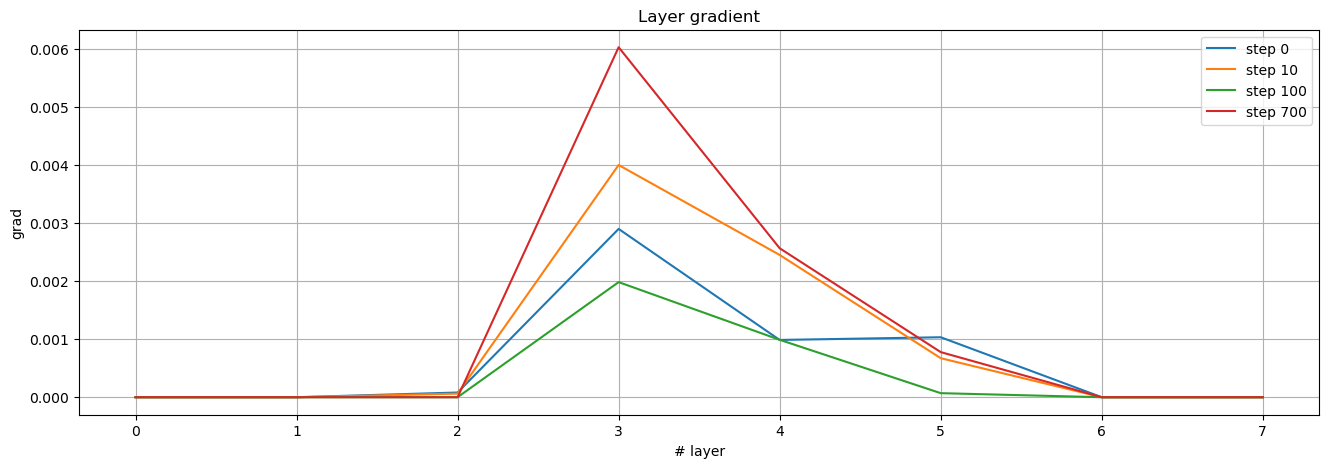

In [69]:
grad_log = np.array(grad_log)

plt.figure(figsize=(16,5))
plt.title('Layer gradient')
plt.xlabel('# layer')
plt.ylabel('grad')
plt.grid()

plt.plot(np.abs(grad_log[0, :]), label='step 0')
plt.plot(np.abs(grad_log[10, :]), label='step 10')
plt.plot(np.abs(grad_log[100, :]), label='step 100')
plt.plot(np.abs(grad_log[700, :]), label='step 700')
plt.legend()
plt.show()